# Introduction

Thevenin equivalence is a powerful tool for analyzing the properties of more
complex circuits. It allows engineers to understand the power output a single
part of a circuit while ignoring the internal components. This can be used to
understand amplifiers, power supplies, and maximally efficient electric lighting
circuits, for example.

# Exercise I

Bridge circuit data:

| $R_{\mathrm{load}}$ (Ω) | $I_{\mathrm{load}}$ (mA) | $V_{ab}$ (V) |
|-------------------------|--------------------------|-----------------------|
| $\infin$                | 0                        | 4.11                  |
| 47k                     | 0.08                     | 3.959                 |
| 20k                     | 0.19                     | 3.766                 |
| 10k                     | 0.35                     | 3.476                 |
| 4.7k                    | 0.63                     | 2.962                 |
| 2.2k                    | 1.03                     | 2.241                 |
| 1k                      | 1.47                     | 1.456                 |
| 470                     | 1.81                     | 0.845                 |
| 100                     | 2.16                     | 0.214                 |
| 0                       | 2.28                     | 0                     |



The curve is linear. The slope is: 4.104488722955604 V/mA
4104.488722955603 V/A (Ω)


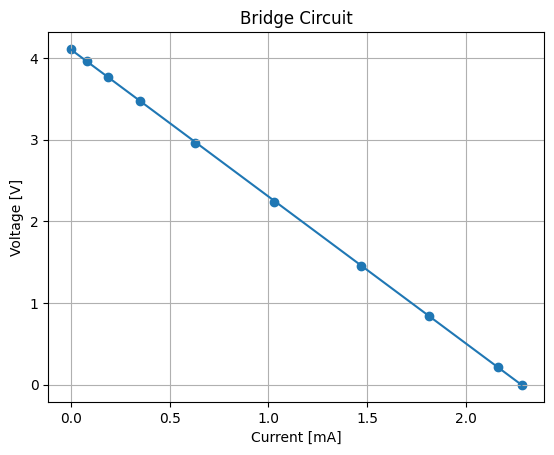

In [1]:
from math import *

import numpy as np
import matplotlib.pyplot as plt

exercise_1 = np.array([
    [np.inf, 0, 4.11],
    [47000, 0.08, 3.959],
    [20000, 0.19, 3.766],
    [10000, 0.35, 3.476],
    [4700, 0.63, 2.962],
    [2200, 1.03, 2.241],
    [1000, 1.47, 1.456],
    [470, 1.81, 0.845],
    [100, 2.16, 0.214],
    [0, 2.28, 0],
])

z = np.polyfit(exercise_1[:,1], exercise_1[:,2], 1)
p = np.poly1d(z)

plt.plot(exercise_1[:,1], p(exercise_1[:,1]))
plt.scatter(exercise_1[:,1], exercise_1[:,2])
plt.title("Bridge Circuit")
plt.xlabel("Current [mA]")
plt.ylabel("Voltage [V]")
plt.grid()

print(f"The curve is linear. The slope is: {z[1]} V/mA")
print(f"{z[1]*1000} V/A (Ω)")



The short circuit resistance between (a) and (b) was around 2.5 kΩ when
measured. This is a seemingly unusual reading which doesn't match the slope or
the Thevenin resistance. It could be caused by an issue with the waveform
generator adding resistance to the circuit since it remained attached but off.

With the Thevenin voltage (open circuit voltage) and Norton current (short
circuit current), the Thevenin equivalent circuit can be made.

$$ V_{th} = 4.11 \, \mathrm{V} \qquad I_N = 2.28 \, \mathrm{mA} $$

$$ R_{th} = \frac{V_{th}}{I_N} = 1802.63 \, \Omega $$



Thevenin equivalent circuit data (using a 2.2 kΩ resistor to approximate the
$R_{th}$ of 1.803 kΩ):

| $R_{\mathrm{load}}$ (Ω) | $I_{\mathrm{load}}$ (mA) | $V_{ab}$ (V) |
|-------------------------|--------------------------|--------------|
| $\infin$                | 0                        | 4            |
| 47k                     | 0.08                     | 3.926        |
| 20k                     | 0.18                     | 3.702        |
| 10k                     | 0.33                     | 3.368        |
| 4.7k                    | 0.59                     | 2.799        |
| 2.2k                    | 0.93                     | 2.055        |
| 1k                      | 1.28                     | 1.284        |
| 470                     | 1.54                     | 0.724        |
| 100                     | 1.79                     | 0.178        |
| 0                       | 2                        | 0            |






The curve is linear. The slope is: 4.093991496223372 V/mA
4093.9914962233715 V/A (Ω)


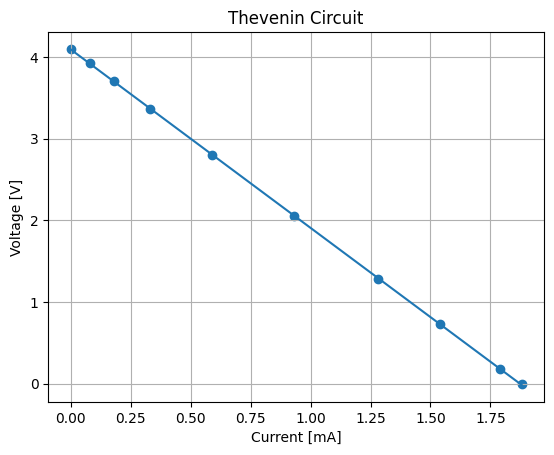

In [2]:
from math import *

import numpy as np
import matplotlib.pyplot as plt

exercise_1b = np.array([
    [np.inf, 0, 4.100],
    [47000, 0.08, 3.926],
    [20000, 0.18, 3.702],
    [10000, 0.33, 3.368],
    [4700, 0.59, 2.799],
    [2200, 0.93, 2.055],
    [1000, 1.28, 1.284],
    [470, 1.54, 0.724],
    [100, 1.79, 0.178],
    [0, 1.88, 0],
])

zb = np.polyfit(exercise_1b[:,1], exercise_1b[:,2], 1)
pb = np.poly1d(zb)

plt.plot(exercise_1b[:,1], pb(exercise_1b[:,1]))
plt.scatter(exercise_1b[:,1], exercise_1b[:,2])
plt.title("Thevenin Circuit")
plt.xlabel("Current [mA]")
plt.ylabel("Voltage [V]")
plt.grid()

print(f"The curve is linear. The slope is: {zb[1]} V/mA")
print(f"{zb[1]*1000} V/A (Ω)")



Both graphs together:

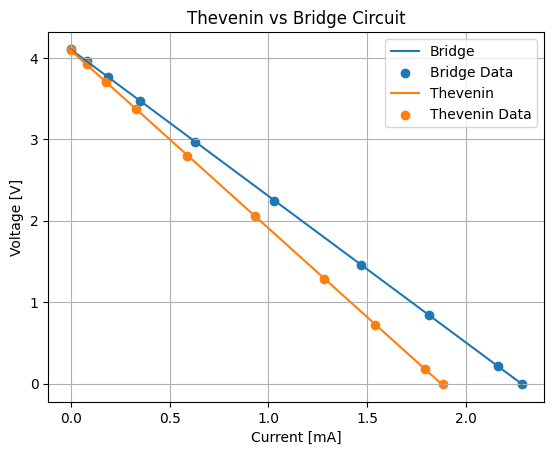

In [3]:
plt.plot(exercise_1[:,1], p(exercise_1[:,1]))
plt.scatter(exercise_1[:,1], exercise_1[:,2])
plt.plot(exercise_1b[:,1], pb(exercise_1b[:,1]))
plt.scatter(exercise_1b[:,1], exercise_1b[:,2])
plt.title("Thevenin vs Bridge Circuit")
plt.xlabel("Current [mA]")
plt.ylabel("Voltage [V]")
plt.grid()
plt.legend(["Bridge", "Bridge Data", "Thevenin", "Thevenin Data"])

The difference is almost entirely due to the different $R_{th}$ resistors used.
If a resistor closer to 1.803 kΩ instead of 2.2 kΩ was chosen, the lines would
be much closer to each other. Besides that, they are quite similar, which shows
the principle of Thevenin equivalence.

# Exercise II

Calculated using $P=VI$ and a calculator, no Python.

| $R_{\mathrm{load}}$ (Ω) | $P_L$ (mW) |
|-------------------------|------------|
| $\infin$                | 0          |
| 47k                     | 0.314      |
| 20k                     | 0.666      |
| 10k                     | 1.111      |
| 4.7k                    | 1.651      |
| 2.2k                    | 1.911      |
| 1k                      | 1.644      |
| 470                     | 1.115      |
| 100                     | 0.319      |
| 0                       | 0          |

The maximum power transfer is given by:

$$ R_L = R_{th} \implies $$

$$ P_{\mathrm{max}} = \left(\frac{V_{th}}{R_{th} + R_L}\right)^2 R_{L} =
\left(\frac{V_{th}}{2R_{th}}\right)^2 R_{th} $$



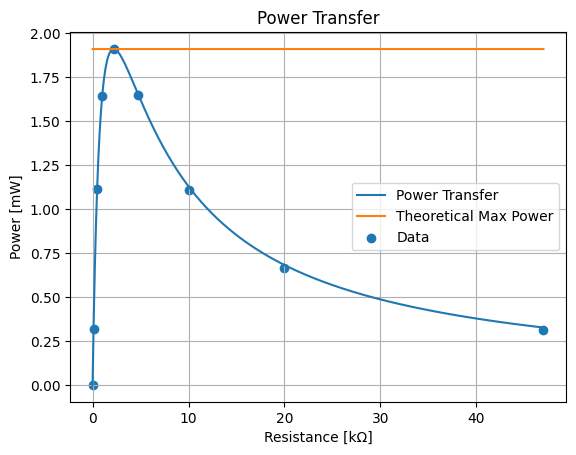

In [4]:
r_l = np.array([47000, 20000, 10000, 4700, 2200, 1000, 470, 100, 0])
p_l = np.array([0.314, 0.666, 1.111, 1.651, 1.911, 1.644, 1.115, 0.319, 0])

r = np.linspace(0, 47000, 10000)

# Using 2.2 kΩ for the R_th here to match actual circuit values

plt.plot(r/1000, (r*(4.1/(2200 + r))**2)*1000)
plt.plot(r/1000, r*0 + 1000*2200*(4.1/(2*2200))**2)
plt.scatter(r_l/1000, p_l)
plt.title("Power Transfer")
plt.xlabel("Resistance [kΩ]")
plt.ylabel("Power [mW]")
plt.grid()
plt.legend(["Power Transfer","Theoretical Max Power", "Data"])


The 2.2 kΩ maximizes the power in the graph, which makes sense since it is the
same as the Thevenin resistance. It is the asymptote of the graph for $R_L \to
\infin $ is 0, which makes sense since infinite resistance blocks all current
and power is $P = VI$. To check each resistor's power output to verify one
maximizes the output, you could let each resistor reach equilibrium temperature
and find whichever resistor produces the most heat (is at the highest
equilibrium temperature).

# Conclusion

Throughout this lab, the principles of Thevenin equivalence and the methods to
calculate it, including Norton current, were utilized extensively. The equations
all matched with reality to some degree, with only a small discrepancy for
$R_{th}$ and the different value chosen for the physical Thevenin circuit.
